In [94]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

algorithms = ["KNN Original", "KNN PCA", "SVM ORIGINAL", "SVM PCA", "NN ORIGINAL", "NN PCA"]

dinamic = open("dinamic.txt", "r")
statics = open("static.txt", "r")

dinamic_list = dinamic.read().split("Online")
dinamic_list = dinamic_list[1:]

statics_list = statics.read().split("Static")
statics_list = statics_list[1:]

def print_metrics(list_metrics, name):
    print(name)
    print("\t Mean x: ", list_metrics[0])
    print("\t Mean y: ", list_metrics[1])
    print("\t Variance x: ", list_metrics[2])
    print("\t Variance y: ", list_metrics[3])
    print("\t RSME: ", list_metrics[4])
    print("\t Time: ", list_metrics[5])
    
def print_metrics_boxplot(list_rsme):
    
    median = np.median(list_rsme)
    _95th = np.percentile(list_rsme, 95)
    _90th = np.percentile(list_rsme, 90)
    upper_quartile = np.percentile(list_rsme, 75)
    lower_quartile = np.percentile(list_rsme, 25)

    iqr = upper_quartile - lower_quartile
    #upper_whisker = list_rsme[list_rsme<=upper_quartile+1.5*iqr].max()
    #lower_whisker = list_rsme[list_rsme>=lower_quartile-1.5*iqr].min()
    
    hi_val = upper_quartile + 1.5 * iqr
    wisk_hi = np.compress(list_rsme <= hi_val, list_rsme)
    if len(wisk_hi) == 0 or np.max(wisk_hi) < upper_quartile:
        wisk_hi = upper_quartile
    else:
        wisk_hi = max(wisk_hi)

    # get low extreme
    lo_val = lower_quartile - 1.5 * iqr
    wisk_lo = np.compress(list_rsme >= lo_val, list_rsme)
    if len(wisk_lo) == 0 or np.min(wisk_lo) > lower_quartile:
        wisk_lo = lower_quartile
    else:
        wisk_lo = min(wisk_lo)
    
    print("\n\t Mediana: ", median)
    print("\t 95th: ", _95th)
    print("\t 90th: ", _90th)
    print("\t 75th: ", upper_quartile)
    print("\t 25th: ", lower_quartile)
    print("\t IQR: ", iqr)
    print("\t Min: ", wisk_lo)
    print("\t Max: ", wisk_hi)
    
def plotCDF(lista, title, algorithm):
    
    N = len(lista)
    X2 = np.sort(lista)
    F2 = np.array(range(N))/float(N)
    print(F2)

    plt.plot(X2, F2, label = algorithm)
    plt.ylabel("CDF")
    plt.xlabel("Error (m)")
    plt.title(title)
    plt.legend()
    plt.show()
    
def plotBoxPlot():
    return

def get_mean_error(x, y, punto_original, tiempo):
    
    resta_x = list(map(abs, x-punto_original[0]))
    resta_x = list(map(lambda n: n-20 if n >20 else n-5, resta_x))
    promedio_x = np.mean(resta_x)
    varianza_x = np.var(resta_x)
    resta_y = list(map(abs, y-punto_original[1]))
    resta_y = list(map(lambda n: n-2 if n >2 else n, resta_y))
    promedio_y = np.mean(resta_y)
    varianza_y = np.var(resta_y)
    lista_promedios = []
    lista_rsme = []
    suma = 0
    for i in range(len(resta_x)):
        x_resta = resta_x[i]
        y_resta = resta_y[i]
        actual_rsme = math.sqrt(x_resta**2 + y_resta**2)
        lista_rsme.append(actual_rsme)
        suma += actual_rsme
    
    RSME = suma/(len(x))
    return [np.array([promedio_x, promedio_y,varianza_x,varianza_y,RSME, tiempo]), lista_rsme]


def metrics_dinamic(dinamic_list):
    lista_knn = [np.array([0,0,0,0,0,0]), []]
    lista_knnPCA = [np.array([0,0,0,0,0,0]), []]
    lista_svm = [np.array([0,0,0,0,0,0]), []]
    lista_svmPCA = [np.array([0,0,0,0,0,0]), []]
    lista_nn = [np.array([0,0,0,0,0,0]), []]
    lista_nnPCA = [np.array([0,0,0,0,0,0]), []]
    for medicion in dinamic_list:
        x = medicion.split("\n\n")
        x = x[1:-1]
        punto_original = (float(x[0].split()[0]), float(x[0].split()[1]))
        for i in range(len(x)):
            if(x[i] in algorithms):
                lista_x = np.fromstring(x[i+1], dtype=float, sep = " ")
                lista_y = np.fromstring(x[i+2], dtype=float, sep = " ")
                tiempo = float(x[i+3])
                if(x[i] == "KNN Original"):
                    result_knn =  get_mean_error(lista_x, lista_y, punto_original,tiempo )
                    lista_knn[0] = lista_knn[0] + result_knn[0]
                    lista_knn[1] = lista_knn[1] + result_knn[1]
                elif(x[i] == "KNN PCA"):
                    result_knnPCA =  get_mean_error(lista_x, lista_y, punto_original,tiempo )
                    lista_knnPCA[0] = lista_knnPCA[0] + result_knnPCA[0]
                    lista_knnPCA[1] = lista_knnPCA[1] + result_knnPCA[1]
                elif(x[i] == "SVM ORIGINAL"):
                    result_svm =  get_mean_error(lista_x, lista_y, punto_original,tiempo )
                    lista_svm[0] = lista_svm[0] + result_svm[0]
                    lista_svm[1] = lista_svm[1] + result_svm[1]
                elif(x[i] == "SVM PCA"):
                    result_svmPCA =  get_mean_error(lista_x, lista_y, punto_original,tiempo )
                    lista_svmPCA[0] = lista_svmPCA[0] + result_svmPCA[0]
                    lista_svmPCA[1] = lista_svmPCA[1] + result_svmPCA[1]
                elif(x[i] == "NN ORIGINAL"):
                    result_nn =  get_mean_error(lista_x, lista_y, punto_original,tiempo )
                    lista_nn[0] = lista_nn[0] + result_nn[0]
                    lista_nn[1] = lista_nn[1] + result_nn[1]
                elif(x[i] == "NN PCA"):
                    result_nnPCA =  get_mean_error(lista_x, lista_y, punto_original,tiempo )
                    lista_nnPCA[0] = lista_nnPCA[0] + result_nnPCA[0]
                    lista_nnPCA[1] = lista_nnPCA[1] + result_nnPCA[1]
    
                
        
    print_metrics(lista_knn[0]/len(dinamic_list), algorithms[0])
    print_metrics_boxplot(lista_knn[1])
    print_metrics(lista_knnPCA[0]/len(dinamic_list), algorithms[1])
    print_metrics_boxplot(lista_knnPCA[1])
    print_metrics(lista_svm[0]/len(dinamic_list), algorithms[2])
    print_metrics_boxplot(lista_svm[1])
    print_metrics(lista_svmPCA[0]/len(dinamic_list), algorithms[3])
    print_metrics_boxplot(lista_svmPCA[1])
    print_metrics(lista_nn[0]/len(dinamic_list), algorithms[4])
    print_metrics_boxplot(lista_nn[1])
    print_metrics(lista_nnPCA[0]/len(dinamic_list), algorithms[5])
    print_metrics_boxplot(lista_nnPCA[1])
    
    # Plot graphics
    
    print(len(lista_knn[1]))
    print(len(lista_knnPCA[1]))
    print(len(lista_svm[1]))
    print(len(lista_svmPCA[1]))
    print(len(lista_nn[1]))
    print(len(lista_nnPCA[1]))
    
    plotCDF(lista_knn[1], "CDF " + algorithms[0], algorithms[0])
    plotCDF(lista_knnPCA[1], "CDF " + algorithms[1], algorithms[1])
    plotCDF(lista_svm[1], "CDF " + algorithms[2], algorithms[2])
    plotCDF(lista_svmPCA[1], "CDF " + algorithms[3], algorithms[3])
    plotCDF(lista_nn[1], "CDF " + algorithms[4], algorithms[4])
    plotCDF(lista_nnPCA[1], "CDF " + algorithms[5], algorithms[5])
    
    return [lista_knn[1], lista_knnPCA[1], lista_svm[1], lista_svmPCA[1], lista_nn[1], lista_nnPCA[1] ]
        
    
dinamic.close()

Metricas Dinamica

KNN Original
	 Mean x:  1.58587159899
	 Mean y:  4.63919043699
	 Variance x:  7.1970714883
	 Variance y:  2.17806279754
	 RSME:  6.93232828711
	 Time:  64.9642728925

	 Mediana:  6.0827625303
	 95th:  10.4403065089
	 90th:  10.0498756211
	 75th:  9.21954445729
	 25th:  3.60555127546
	 IQR:  5.61399318183
	 Min:  1.0
	 Max:  16.0
KNN PCA
	 Mean x:  2.00234118907
	 Mean y:  4.39831748577
	 Variance x:  7.51130261598
	 Variance y:  2.06967228347
	 RSME:  6.68124255023
	 Time:  59.6786620464

	 Mediana:  6.0827625303
	 95th:  10.4403065089
	 90th:  10.0498756211
	 75th:  9.21954445729
	 25th:  3.0
	 IQR:  6.21954445729
	 Min:  1.0
	 Max:  16.1554944214
SVM ORIGINAL
	 Mean x:  6.82076149699
	 Mean y:  2.88744588745
	 Variance x:  1.72436728944
	 Variance y:  0.598990705863
	 RSME:  10.0323405307
	 Time:  54.598532557

	 Mediana:  9.21954445729
	 95th:  20.0
	 90th:  16.0
	 75th:  10.0498756211
	 25th:  5.0
	 IQR:  5.04987562112
	 Min:  1.0
	 Max:  16.0
SVM PCA
	 Mean x:  

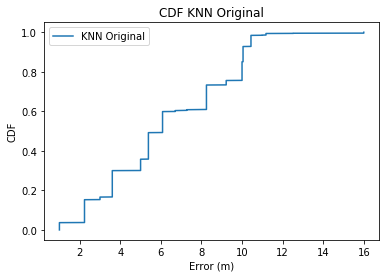

[  0.00000000e+00   6.33713561e-04   1.26742712e-03 ...,   9.98098859e-01
   9.98732573e-01   9.99366286e-01]


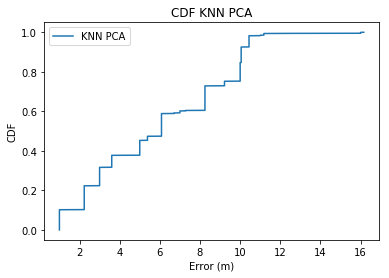

[  0.00000000e+00   6.33713561e-04   1.26742712e-03 ...,   9.98098859e-01
   9.98732573e-01   9.99366286e-01]


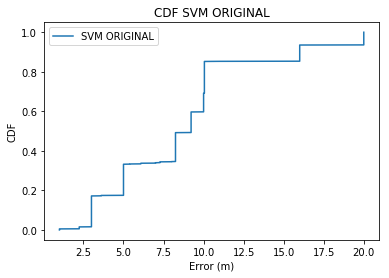

[  0.00000000e+00   6.33713561e-04   1.26742712e-03 ...,   9.98098859e-01
   9.98732573e-01   9.99366286e-01]


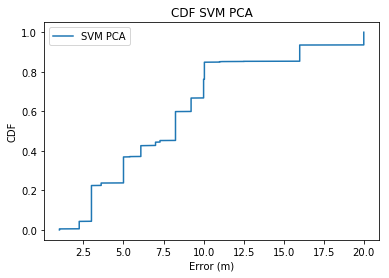

[  0.00000000e+00   6.33713561e-04   1.26742712e-03 ...,   9.98098859e-01
   9.98732573e-01   9.99366286e-01]


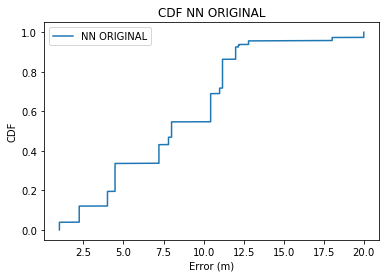

[  0.00000000e+00   6.33713561e-04   1.26742712e-03 ...,   9.98098859e-01
   9.98732573e-01   9.99366286e-01]


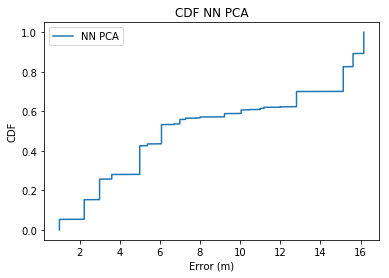



Metricas Estaticas


KNN Original
	 Mean x:  3.23856502242
	 Mean y:  1.54170403587
	 Variance x:  30.7448804521
	 Variance y:  1.09400068371
	 RSME:  5.05208779503
	 Time:  64.7959641256

	 Mediana:  3.0
	 95th:  15.1327459504
	 90th:  15.1327459504
	 75th:  7.0
	 25th:  2.2360679775
	 IQR:  4.7639320225
	 Min:  1.0
	 Max:  11.1803398875
KNN PCA
	 Mean x:  2.98923766816
	 Mean y:  1.44753363229
	 Variance x:  30.148763096
	 Variance y:  1.63917553138
	 RSME:  5.03408872115
	 Time:  59.6439461883

	 Mediana:  3.60555127546
	 95th:  15.1327459504
	 90th:  15.0
	 75th:  7.28010988928
	 25th:  2.2360679775
	 IQR:  5.04404191178
	 Min:  1.0
	 Max:  11.1803398875
SVM ORIGINAL
	 Mean x:  5.24932735426
	 Mean y:  1.69865470852
	 Variance x:  55.4104816103
	 Variance y:  0.75941523055
	 RSME:  7.02410224999
	 Time:  54.733632287

	 Mediana:  2.2360679775
	 95th:  15.1327459504
	 90th:  15.1327459504
	 75th:  15.1327459504
	 25th:  2.2360679775
	 IQR:  12.8966779729
	 Min:  1.0
	 Max:  16.155

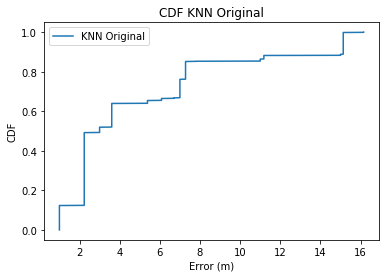

[  0.00000000e+00   4.48430493e-04   8.96860987e-04 ...,   9.98654709e-01
   9.99103139e-01   9.99551570e-01]


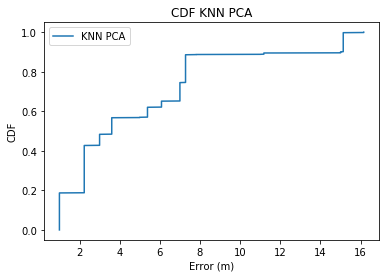

[  0.00000000e+00   4.48430493e-04   8.96860987e-04 ...,   9.98654709e-01
   9.99103139e-01   9.99551570e-01]


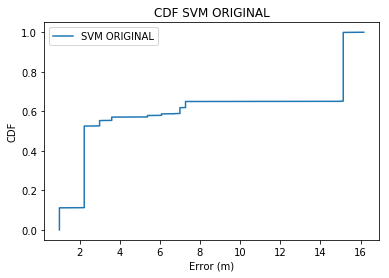

[  0.00000000e+00   4.48430493e-04   8.96860987e-04 ...,   9.98654709e-01
   9.99103139e-01   9.99551570e-01]


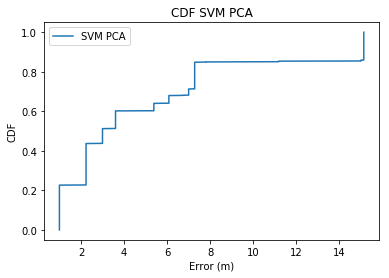

[  0.00000000e+00   4.48430493e-04   8.96860987e-04 ...,   9.98654709e-01
   9.99103139e-01   9.99551570e-01]


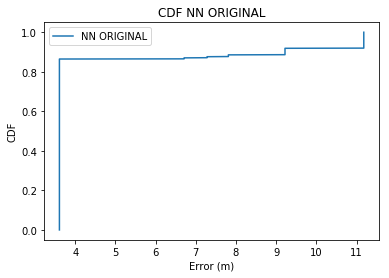

[  0.00000000e+00   4.48430493e-04   8.96860987e-04 ...,   9.98654709e-01
   9.99103139e-01   9.99551570e-01]


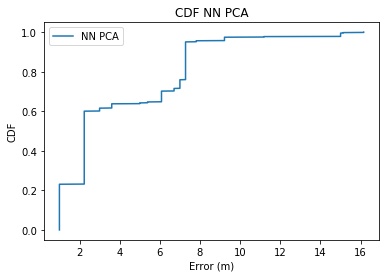

In [95]:
print("Metricas Dinamica\n")
list_rsme_dinamic = metrics_dinamic(dinamic_list)
print("\n\nMetricas Estaticas\n\n")
list_rsme_static = metrics_dinamic(statics_list)

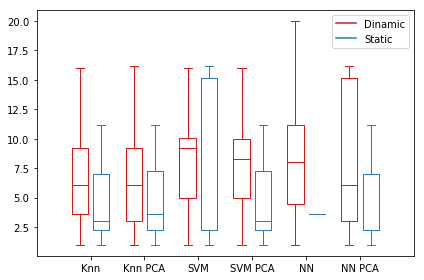

In [96]:
ticks = ['Knn', 'Knn PCA', 'SVM', 'SVM PCA', 'NN', 'NN PCA']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(list_rsme_dinamic, positions=np.array(range(len(list_rsme_dinamic)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(list_rsme_static, positions=np.array(range(len(list_rsme_static)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Dinamic')
plt.plot([], c='#2C7BB6', label='Static')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
#plt.ylim(-100, 100)
plt.tight_layout()
#plt.savefig('boxcompare.png')
plt.show()